In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.jet()

<Figure size 432x288 with 0 Axes>

In [5]:
#model = 'F280FC-1550'
model = 'F810FC-1550'

wavelen = 1550 #nm

#numerical simulation parameters
map_Nsigma = 4
pixelSize = 0.01

In [6]:
if '280' in model: #M1-M1 channels
    CARadius = 2.6
    divAngle = 0.032 #deg
    e2Radius = 1.8 #mm
    channelLength = 1000 #up to ~1 meter
    beamOffset = 3.0
elif '810' in model: #M1-M2 channels
    CARadius = 8.1
    divAngle = 0.016 #deg
    e2Radius = 3.5 #mm
    beamOffset = 7.0
    channelLength = 23000 #up to ~23 meters

In [14]:
returnBeamR = e2Radius+np.radians(divAngle/2)*channelLength*2 #last factor of 2 is due to round trip
print(returnBeamR)

9.922811647339133


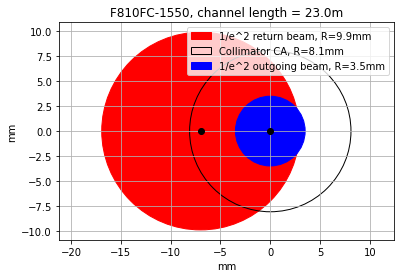

In [176]:
circle1 = plt.Circle((0, 0), e2Radius, color='b', label='1/e^2 outgoing beam, R=%.1fmm'%e2Radius)
circle2 = plt.Circle((-beamOffset, 0), returnBeamR, color='r', label='1/e^2 return beam, R=%.1fmm'%returnBeamR)
circle3 = plt.Circle((0, 0), CARadius, fill=False, label = 'Collimator CA, R=%.1fmm'%CARadius)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle1)

plt.axis('equal')
plt.grid('on')
plt.legend()

plt.xlabel('mm')
plt.ylabel('mm')
plt.title('%s, channel length = %.1fm'%(model,channelLength/1000.))

plt.plot(0,0, 'o', color='black')
plt.plot(-beamOffset,0, 'o', color='black');

#fig.savefig('plotcircles.png')

### Let's do integration numerically

In [177]:
# for Gaussian beam:
#1/e2 half width: w = 2* sigma.
# fwhm = 2.355 * sigma
returnBeamSigma = returnBeamR/2.

map_max = np.ceil(beamOffset+map_Nsigma*returnBeamSigma)
map_min = -map_max
print(map_max)

27.0


In [178]:
nPixel = int((map_max - map_min)/pixelSize)
xVec = np.linspace(map_min, map_max, nPixel)
yVec = np.linspace(map_min, map_max, nPixel)
[x, y] = np.meshgrid(xVec, yVec)

z= np.exp(- ((x-(-beamOffset))**2+(y-0)**2)/2/returnBeamSigma**2 )

In [179]:
idx = x**2+y**2 < CARadius**2
idxCircle = (x**2+y**2 < CARadius**2+0.1) & (x**2+y**2 > CARadius**2-0.1)
idxe2 = (z > 0.134) & (z < 0.136)

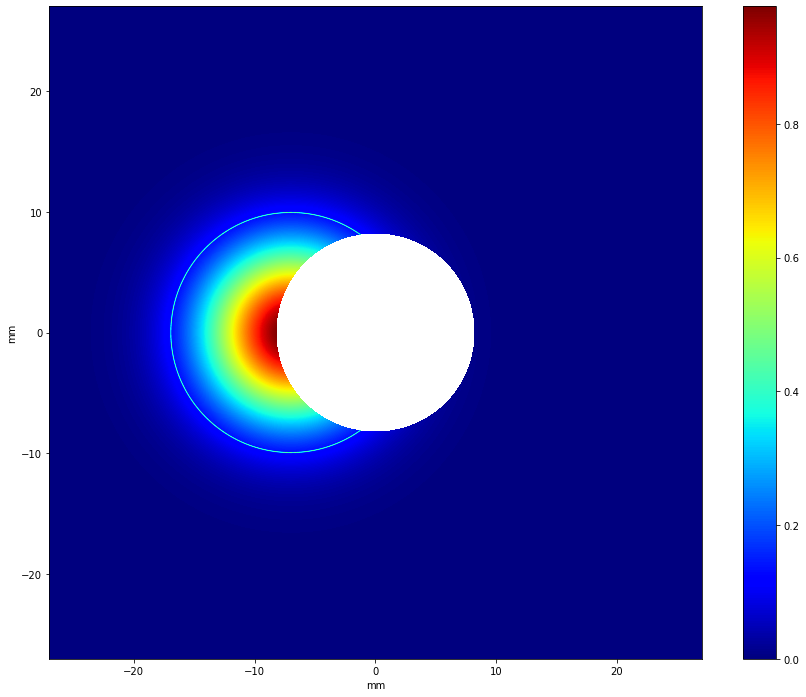

In [180]:
zplot = z.copy()
zplot[idx] = np.nan
zplot[idxe2]=0.8 #zplot[idxe2]+0.2
fig, ax = plt.subplots(1,1, figsize=(15,12))
plt.imshow(zplot, extent=[map_min, map_max, map_min, map_max])
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar();

In [181]:
print(np.sum(z[idx])/np.sum(z))

0.44422451535475077
